# Assignment 2

In [33]:
# Pandas is for using data structures
import pandas as pd
# numpy is for numerical computing of array and matrix
import numpy as np
# Matplotlib is a plotting package
import matplotlib.pyplot as plt
# matplotlib Showing the plot right after the current code  
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [34]:
car = pd.read_csv('CarPrice.csv',sep=",")
N_car = car.shape
N_car

(205, 14)

In [35]:
car.head()

,fueltype,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,price
0,gas,two,front,88.6,168.8,64.1,48.8,2548,130,111,5000,21,27,13495.0
1,gas,two,rear,88.6,168.8,64.1,48.8,2548,130,111,5000,21,27,16500.0
2,gas,two,front,94.5,171.2,65.5,52.4,2823,152,154,5000,19,26,16500.0
3,gas,four,rear,99.8,176.6,66.2,54.3,2337,109,102,5500,24,30,13950.0
4,gas,four,rear,99.4,176.6,66.4,54.3,2824,136,115,5500,18,22,17450.0


# Q1: Preparing indicator variables

In [36]:
############## Complete the code below ##############
# Task: Create indicator variable for 'enginelocation', set front to be 1 and 0 otherwise
# Replace $fill your code$ by the correct coding, 'fueltype' and 'doornumber' have been completed for your reference
car['fuel-gas']=(car['fueltype']=='gas')*1
car['door-two']=(car['doornumber']=='two')*1
car['engine-front']= (car['enginelocation']=='front')*1
############## End of your code ##############

# Drop the original variables of the dataframe
car.drop(columns=['fueltype','doornumber','enginelocation'],inplace=True)


# Q2: Log transformation

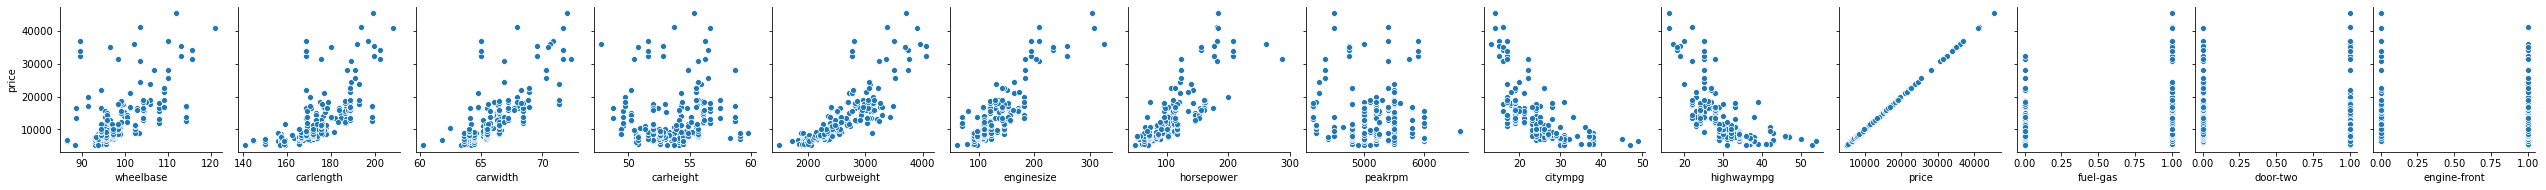

In [37]:
# Visualize the relationship between price and each variables; most of them have curve pattern
# So it is suggested to apply log transformation on price
import seaborn as sns 
sns.pairplot(car,y_vars=['price'],x_vars=car.columns)

In [38]:
############## Complete the code below ##############
# Task: Apply log transformation on 'price' and store the transformed data to 'logPrice' in the dataframe; 
# 'logPrice' will be the response variable for the rest
# Replace $fill your code$ by the correct coding
# Hints: using log function in numpy package
car['logPrice']=np.log(car['price'])
############## End of your code ##############

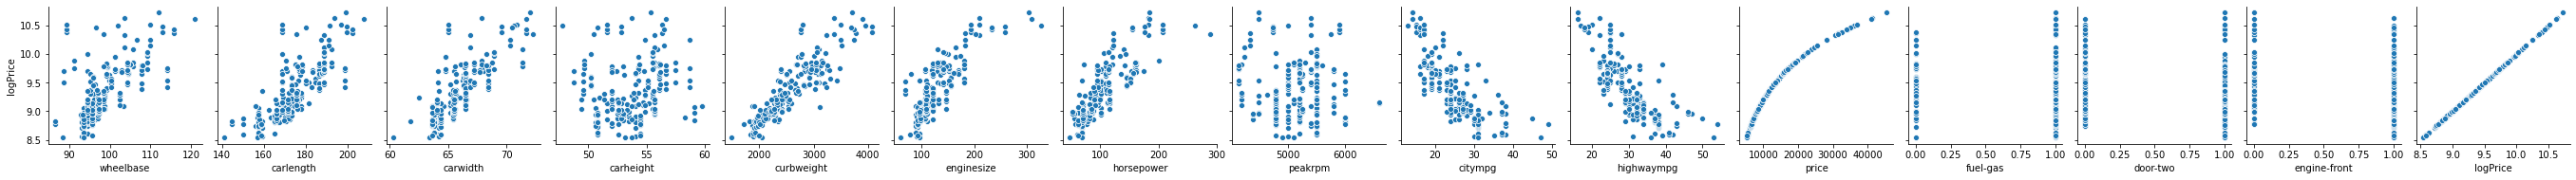

In [39]:
# Visualize the relationship between logPrice and each variables;
sns.pairplot(car,y_vars=['logPrice'],x_vars=car.columns)

# Split data into training and testing set
- we will use training set for Q3-4
- we will use test set for Q5

In [40]:
car_copy = car.copy()
# Training set
train_set = car_copy.sample(frac=0.70, random_state=2600)
# Test set
test_set = car_copy.drop(train_set.index)
train_set.shape, test_set.shape

((144, 15), (61, 15))

In [41]:
# X and Y in the trainig set
Y=train_set['logPrice']
X=train_set.drop(columns=['price','logPrice'])

# Best Subset Selection


In [42]:
# Remember to put the 'model_selection.py' in the folder 'model_selection', 
# and put such folder in the same working directory of this jupyter notebook
from model_selection import model_selection as MS

# Q3a: Running best subset selection

,numb_features,SSE,R_squared,Adj_R2,AIC,BIC,C_p,features
4,1,7.079229,0.806052,0.804686,-21.167047,-15.227421,0.049611,"(curbweight,)"
56,2,5.279358,0.855363,0.853311,-61.410965,-52.501525,0.037561,"(curbweight, horsepower)"
222,3,4.873130,0.866492,0.863631,-70.940764,-59.061511,0.035189,"(carwidth, curbweight, horsepower)"
810,4,4.714813,0.870830,0.867112,-73.696682,-58.847616,0.034539,"(carwidth, curbweight, horsepower, engine-front)"
2026,5,4.535400,0.875745,0.871243,-77.283320,-59.464440,0.033742,"(carwidth, curbweight, horsepower, peakrpm, en..."
3763,6,4.457118,0.877890,0.872542,-77.790471,-57.001778,0.033648,"(carwidth, curbweight, enginesize, horsepower,..."
5149,7,4.370337,0.880267,0.874104,-78.621850,-54.863344,0.033495,"(carlength, carwidth, curbweight, enginesize, ..."
6735,8,4.325456,0.881497,0.874474,-78.108285,-51.379965,0.033632,"(carlength, carwidth, curbweight, enginesize, ..."
7760,9,4.274806,0.882884,0.875018,-77.804440,-48.106307,0.033730,"(carwidth, carheight, curbweight, enginesize, ..."
8089,10,4.233755,0.884009,0.875288,-77.193965,-44.526019,0.033894,"(carwidth, carheight, curbweight, enginesize, ..."


,Adj_R2,AIC,BIC,C_p
0,carwidth,carlength,carwidth,carlength
1,carheight,carwidth,curbweight,carwidth
2,curbweight,curbweight,horsepower,curbweight
3,enginesize,enginesize,peakrpm,enginesize
4,horsepower,horsepower,engine-front,horsepower
5,peakrpm,peakrpm,NaN,peakrpm
6,citympg,engine-front,NaN,engine-front
7,highwaympg,NaN,NaN,NaN
8,fuel-gas,NaN,NaN,NaN
9,engine-front,NaN,NaN,NaN


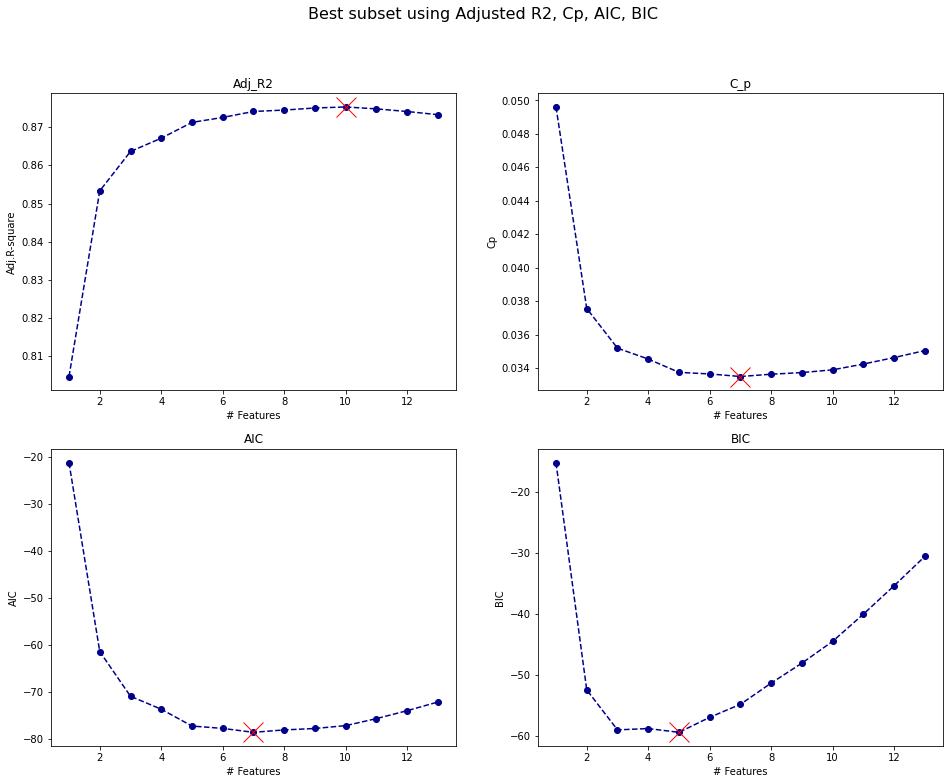

In [43]:
############## Complete the code below ##############
# Task: Apply best subset selection and put the result to 'best_result' 
# Replace $fill your code$ by the correct coding
# Hints: 'best_subset()' in model_selection package
best_result= MS.best_subset(X,Y)
############## End of your code ##############
best_result

# Model.1 - Best Subset by AIC

In [44]:
X_feature_AIC=best_result['AIC'].dropna()
fit_AIC = sm.OLS(train_set['logPrice'], sm.add_constant(train_set[X_feature_AIC])).fit()
print(fit_AIC.summary())

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     142.8
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.86e-59
Time:                        13:20:08   Log-Likelihood:                 47.311
No. Observations:                 144   AIC:                            -78.62
Df Residuals:                     136   BIC:                            -54.86
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.2426      0.825      5.142   

# Q3b: Model.2 - Best Subset by BIC

In [45]:
############## Complete the code below ##############
# Task: Fitting the best subset model according to BIC 
# Replace $fill your code$ by the correct coding, you may refernce to the previous block of Model.1
X_feature_BIC = best_result['BIC'].dropna()
fit_BIC = sm.OLS(train_set['logPrice'], sm.add_constant(train_set[X_feature_BIC])).fit()
############## End of your code ##############
print(fit_BIC.summary())

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.17e-60
Time:                        13:20:25   Log-Likelihood:                 44.642
No. Observations:                 144   AIC:                            -77.28
Df Residuals:                     138   BIC:                            -59.46
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1108      0.831      4.948   

# Forward selection

# Q4a: Running forward selection

,features,features added,SSE,R_squared,Adj_R2,AIC,BIC,C_p,numb_features
step 1,[curbweight],curbweight,7.079229,0.806052,0.804686,-21.167047,-15.227421,0.049611,1
step 2,"[curbweight, horsepower]",horsepower,5.279358,0.855363,0.853311,-61.410965,-52.501525,0.037561,2
step 3,"[curbweight, horsepower, carwidth]",carwidth,4.873130,0.866492,0.863631,-70.940764,-59.061511,0.035189,3
step 4,"[curbweight, horsepower, carwidth, engine-front]",engine-front,4.714813,0.870830,0.867112,-73.696682,-58.847616,0.034539,4
step 5,"[curbweight, horsepower, carwidth, engine-fron...",peakrpm,4.535400,0.875745,0.871243,-77.283320,-59.464440,0.033742,5
step 6,"[curbweight, horsepower, carwidth, engine-fron...",enginesize,4.457118,0.877890,0.872542,-77.790471,-57.001778,0.033648,6
step 7,"[curbweight, horsepower, carwidth, engine-fron...",carlength,4.370337,0.880267,0.874104,-78.621850,-54.863344,0.033495,7
step 8,"[curbweight, horsepower, carwidth, engine-fron...",highwaympg,4.325456,0.881497,0.874474,-78.108285,-51.379965,0.033632,8
step 9,"[curbweight, horsepower, carwidth, engine-fron...",citympg,4.285733,0.882585,0.874699,-77.436840,-47.738707,0.033806,9
step 10,"[curbweight, horsepower, carwidth, engine-fron...",fuel-gas,4.251825,0.883514,0.874756,-76.580670,-43.912723,0.034020,10


,Adj_R2,AIC,BIC
0,curbweight,curbweight,curbweight
1,horsepower,horsepower,horsepower
2,carwidth,carwidth,carwidth
3,engine-front,engine-front,engine-front
4,peakrpm,peakrpm,peakrpm
5,enginesize,enginesize,NaN
6,carlength,carlength,NaN
7,highwaympg,NaN,NaN
8,citympg,NaN,NaN
9,fuel-gas,NaN,NaN


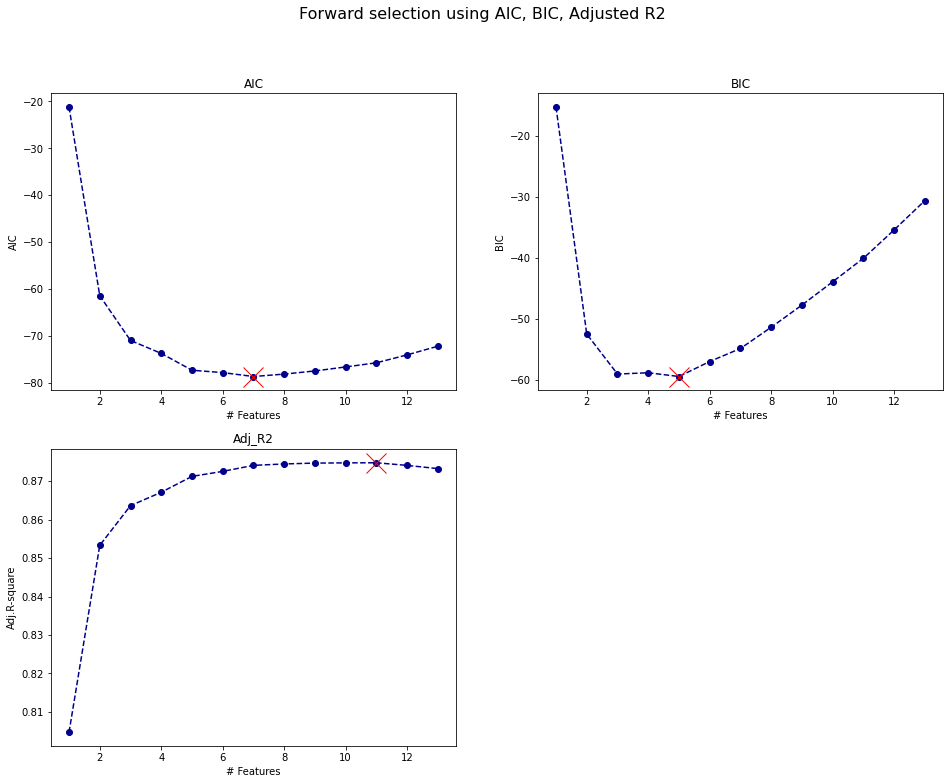

In [46]:
############## Complete the code below ##############
# Task: Apply forward selection and put the result to 'forward_result' 
# Replace $fill your code$ by the correct coding
# Hints: 'forward_selection()' in model_selection package
forward_result= MS.forward_selection(X,Y)
############## End of your code ##############
forward_result

# Model.3 - Forward selection (AIC)

In [47]:
X_feature_AIC_FD = forward_result['AIC'].dropna()
fit_forward_AIC = sm.OLS(train_set['logPrice'], sm.add_constant(train_set[X_feature_AIC_FD])).fit()
print(fit_forward_AIC.summary())

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     142.8
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.86e-59
Time:                        13:21:11   Log-Likelihood:                 47.311
No. Observations:                 144   AIC:                            -78.62
Df Residuals:                     136   BIC:                            -54.86
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.2426      0.825      5.142   

# Q4b: Model.4 - Forward selection (BIC)

In [48]:
############## Complete the code below ##############
# Task: Fitting the forward selection model accoding to BIC 
# Replace $fill your code$ by the correct coding, you may refernce to the previous block of Model.3
X_feature_BIC_FD = forward_result['BIC'].dropna()
fit_forward_BIC = sm.OLS(train_set['logPrice'], sm.add_constant(train_set[X_feature_BIC_FD])).fit()
############## End of your code ##############
print(fit_forward_BIC.summary())

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.17e-60
Time:                        13:21:26   Log-Likelihood:                 44.642
No. Observations:                 144   AIC:                            -77.28
Df Residuals:                     138   BIC:                            -59.46
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1108      0.831      4.948   

# Q5: Predictive measure by MSE
- Calculate the MSE using test set data

In [49]:
# X and Y for test set
Y_test=test_set['logPrice']
X_test=test_set.drop(columns=['price','logPrice'])

In [50]:
############## Complete the code below ##############
# Task: Calculate the MSE using test set data for forward selection model by AIC and BIC respectively
# Replace $fill your code$ by the correct coding, you may refernce to code below for best subset selection by AIC/BIC

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# MSE for best subset selection by AIC/BIC
mse_best_AIC = mean_squared_error(Y_test, fit_AIC.predict(sm.add_constant(X_test[X_feature_AIC])))
mse_best_BIC = mean_squared_error(Y_test, fit_BIC.predict(sm.add_constant(X_test[X_feature_BIC])))

# MSE for forward selection by AIC/BIC
mse_forward_AIC = mean_squared_error(Y_test, fit_forward_AIC.predict(sm.add_constant(X_test[X_feature_AIC_FD])))
mse_forward_BIC = mean_squared_error(Y_test, fit_forward_BIC.predict(sm.add_constant(X_test[X_feature_BIC_FD])))


############## End of your code ##############

print ('MSE.best.AIC:          %.5f'% mse_best_AIC)
print ('MSE.best.BIC:          %.5f'% mse_best_BIC)
print ('MSE.forward.AIC:        %.5f'% mse_forward_AIC)
print ('MSE.forward.BIC:        %.5f'% mse_forward_BIC)


MSE.best.AIC:          0.04320
MSE.best.BIC:          0.04352
MSE.forward.AIC:        0.04320
MSE.forward.BIC:        0.04352


* Model1/Model3 has the lowest MSE

# Q6: Final model
- Refit the minimum MSE model of above using full dataset

In [51]:
############## Complete the code below ##############
# Task: Identify the mimimum MSE model in Q5, then using the full dataset (i.e. 'car') to fit the final model
# Replace $fill your code$ by the correct coding

final_model = sm.OLS(Y,sm.add_constant(X)).fit()

############## End of your code ##############

print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     76.79
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           2.18e-54
Time:                        13:22:03   Log-Likelihood:                 50.078
No. Observations:                 144   AIC:                            -72.16
Df Residuals:                     130   BIC:                            -30.58
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.1878      1.052      3.030   

# Q7: Understanding the model

### a. Which predictors in the final model are not useful at 5% significant level?

### b. Interpret the coefficient of 'carwidth' for log(price) in the final model.

###  c. Interpret the coefficient of 'carwidth' for price in the final model.


### d. There are two car models with the same setup but the engine location (front/rear), which one has a higher price under the final model?


### Answer (Double-click  ℎ𝑒𝑟𝑒  to type your answer below):

a) Wheelbase, carlength, carheight, enginesize, citympg, highwaympg, fuel-gas and door-two in the final model as they are predictors with p-value larger than 0.05. 

b) The coefficient of 'carwidth' for log(price) in the final model is 0.0407. So when the car width changes by 1 unit, the log(price) changes by 0.0407 unit.


c) The coefficient of 'carwidth' for log(price) in the final model is 0.0407. So when the car width changes by 1 unit, the price changes by ~4.07%.


d) The car with 'engine-rear' has a higher price in the final model. It is higher than the 'engine-front' by 0.0822 dollars.

